In [1]:
library(gdata)
library(rstan)
library(rstanarm)
library(RcppCNPy)

Warning message:
: package ‘gdata’ was built under R version 3.2.4gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

Następujący obiekt został zakryty z ‘package:stats’:

    nobs

Następujący obiekt został zakryty z ‘package:utils’:

    object.size

Warning message:
: package ‘rstan’ was built under R version 3.2.4Loading required package: ggplot2
Loading required package: StanHeaders
Warning message:
: package ‘StanHeaders’ was built under R version 3.2.4rstan (Version 2.12.1, packaged: 2016-09-11 13:07:50 UTC, GitRev: 85f7a56811da)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Warning message:
: package ‘rstanarm’ was built under R version 3.2.4Loading required package: Rcpp
Warning message:
: package ‘Rcpp’ was built under R version 3.2.4rstanarm (Version 2.12.1, packa

#### Read the data and transform strategy

In [2]:
data = read.xls('data/deception_IQ_data_anonymous.xlsx')

data$strategy_binary = 0
data$strategy_binary[data$strategy > 0.5] = 1

# The main analysis
This is the analysis pipeline presented in the main body of the manuscript

## Prepare the data

### Experiment 1

In [3]:
data_s1 = data[data$study == 1 & data$include == 1,]

#### Get only complete cases and z-score the input variables

In [4]:
data_s1_complete = data_s1[complete.cases(data_s1[,c(4:17, 19:23)]),]
data_s1_complete_Z = data.frame(scale(data_s1_complete[,c(5, 7:17, 19:23)]))
names(data_s1_complete_Z) = paste(names(data_s1_complete_Z), "_Z", sep="")
data_s1_complete <- cbind(data_s1_complete, data_s1_complete_Z)

#### Demean the gender variable

In [5]:
data_s1_complete$sex_demeaned = data_s1_complete$sex - mean(data_s1_complete$sex)

### Experiment 2

In [6]:
data_s2 = data[data$study == 2 & data$include == 1,]

#### Get only complete cases and z-score the input variables

In [7]:
data_s2_complete = data_s2[complete.cases(data_s2[,c(4:17, 19:23)]),]
data_s2_complete_Z = data.frame(scale(data_s2_complete[,c(5, 7:17, 19:23)]))
names(data_s2_complete_Z) = paste(names(data_s2_complete_Z), "_Z", sep="")
data_s2_complete <- cbind(data_s2_complete, data_s2_complete_Z)

#### Demean the gender variable

In [8]:
data_s2_complete$sex_demeaned = data_s2_complete$sex - mean(data_s2_complete$sex)

### Experiment 3

In [9]:
data_s3 = data[data$study == 3 & data$include == 1,]

In [10]:
names(data_s3)

[1] "study"               "id"                  "include"            
 [4] "sex"                 "age"                 "strategy"           
 [7] "RPM_raw"             "RPM_std"             "nb_hits"            
[10] "nb_fa"               "nb_miss"             "nb_cr"              
[13] "nb_dprime"           "nb_bias"             "Stroop_dRT"         
[16] "Stroop_switch_costs" "SSRT"                "CCT_acc"            
[19] "NEO_N_raw"           "NEO_E_raw"           "NEO_O_raw"          
[22] "NEO_A_raw"           "NEO_C_raw"           "strategy_binary"

#### Get only complete cases and z-score the input variables

In [11]:
data_s3_complete = data_s3[complete.cases(data_s3[,c(4:14, 17:23)]),]
data_s3_complete_Z = data.frame(scale(data_s3_complete[,c(5, 7:14, 17:23)]))
names(data_s3_complete_Z) = paste(names(data_s3_complete_Z), "_Z", sep="")
data_s3_complete <- cbind(data_s3_complete, data_s3_complete_Z)

#### Deamean the gender variable

In [12]:
data_s3_complete$sex_demeaned = data_s3_complete$sex - mean(data_s3_complete$sex)

## Analyze the data

### Experiment 1

#### The model
Priors used for the first model and Gaussian with mean 0 and SD = 1. This prior was chosen, because the effects are highly unlikely given the nature of the task and reliabiliy of psychometric tools.

In [13]:
s1_main <- stan_glm(strategy_binary ~ sex_demeaned + 
                            age_Z +
                            RPM_std_Z +
                            nb_dprime_Z +
                            nb_bias_Z +
                            SSRT_Z +
                            Stroop_switch_costs_Z +
                            NEO_N_raw_Z +
                            NEO_E_raw_Z +
                            NEO_O_raw_Z +
                            NEO_A_raw_Z +
                            NEO_C_raw_Z +
                            NEO_N_raw_Z * RPM_std_Z +
                            NEO_E_raw_Z * RPM_std_Z +
                            NEO_O_raw_Z * RPM_std_Z +
                            NEO_A_raw_Z * RPM_std_Z +
                            NEO_C_raw_Z * RPM_std_Z, 
                          data = data_s1_complete, 
                          family = binomial(link = "logit"), 
                          prior_intercept = normal(0,1), 
                          prior = normal(0,1),
                          chains = 4, 
                          cores = 2, 
                          seed = 10, 
                          iter = 10000)

In [14]:
summary(s1_main, digits = 2)

stan_glm(formula = strategy_binary ~ sex_demeaned + age_Z + RPM_std_Z + 
    nb_dprime_Z + nb_bias_Z + SSRT_Z + Stroop_switch_costs_Z + 
    NEO_N_raw_Z + NEO_E_raw_Z + NEO_O_raw_Z + NEO_A_raw_Z + NEO_C_raw_Z + 
    NEO_N_raw_Z * RPM_std_Z + NEO_E_raw_Z * RPM_std_Z + NEO_O_raw_Z * 
    RPM_std_Z + NEO_A_raw_Z * RPM_std_Z + NEO_C_raw_Z * RPM_std_Z, 
    family = binomial(link = "logit"), data = data_s1_complete, 
    chains = 4, cores = 2, seed = 10, iter = 10000, prior = normal(0, 
        1), prior_intercept = normal(0, 1))

Family: binomial (logit)
Algorithm: sampling
Posterior sample size: 20000
Observations: 50

Estimates:
                        mean   sd     2.5%   25%    50%    75%    97.5%
(Intercept)             0.37   0.32  -0.26   0.16   0.37   0.59   1.02 
sex_demeaned            0.16   0.63  -1.07  -0.26   0.17   0.58   1.40 
age_Z                   0.24   0.31  -0.36   0.03   0.23   0.44   0.84 
RPM_std_Z               0.63   0.31   0.03   0.42   0.63   0.84   1.26 
nb_dp

#### Save the posteriors for visualization

In [15]:
posteriors_s1 = as.matrix(s1_main)
npySave('posteriors/main_s1.npy',posteriors_s1)

### Experiment 2

#### Get the priors from first study

In [16]:
priors_s2_main_mean = fixef(s1_main)[c(2:18)]
priors_s2_main_sd = summary(s1_main)[c(2:18),3]

priors_s2_main_mean
priors_s2_main_sd

sex_demeaned                 age_Z             RPM_std_Z 
         0.1675056091          0.2321683830          0.6292245725 
          nb_dprime_Z             nb_bias_Z                SSRT_Z 
         0.1760551352          0.0797095303          0.0136769187 
Stroop_switch_costs_Z           NEO_N_raw_Z           NEO_E_raw_Z 
        -0.0297481025         -0.2024620369          0.1200832131 
          NEO_O_raw_Z           NEO_A_raw_Z           NEO_C_raw_Z 
         0.1472334598         -0.6705716679         -0.2598422171 
RPM_std_Z:NEO_N_raw_Z RPM_std_Z:NEO_E_raw_Z RPM_std_Z:NEO_O_raw_Z 
        -0.0929921130          0.3349998643         -0.1131227427 
RPM_std_Z:NEO_A_raw_Z RPM_std_Z:NEO_C_raw_Z 
         0.1382805487          0.0001236549

sex_demeaned                 age_Z             RPM_std_Z 
            0.6275501             0.3056290             0.3105154 
          nb_dprime_Z             nb_bias_Z                SSRT_Z 
            0.2960658             0.3141007             0.3019090 
Stroop_switch_costs_Z           NEO_N_raw_Z           NEO_E_raw_Z 
            0.2987630             0.3170122             0.3191754 
          NEO_O_raw_Z           NEO_A_raw_Z           NEO_C_raw_Z 
            0.3071518             0.3200715             0.3176631 
RPM_std_Z:NEO_N_raw_Z RPM_std_Z:NEO_E_raw_Z RPM_std_Z:NEO_O_raw_Z 
            0.3293793             0.3306374             0.3358089 
RPM_std_Z:NEO_A_raw_Z RPM_std_Z:NEO_C_raw_Z 
            0.4040200             0.3260820

#### Run the model

In [17]:
s2_main <- stan_glm(strategy_binary ~ sex_demeaned + 
                            age_Z +
                            RPM_std_Z +
                            nb_dprime_Z +
                            nb_bias_Z +
                            SSRT_Z +
                            Stroop_switch_costs_Z +
                            NEO_N_raw_Z +
                            NEO_E_raw_Z +
                            NEO_O_raw_Z +
                            NEO_A_raw_Z +
                            NEO_C_raw_Z +
                            NEO_N_raw_Z * RPM_std_Z +
                            NEO_E_raw_Z * RPM_std_Z +
                            NEO_O_raw_Z * RPM_std_Z +
                            NEO_A_raw_Z * RPM_std_Z +
                            NEO_C_raw_Z * RPM_std_Z, 
                            data = data_s2_complete, family = binomial(link = "logit"), 
                            chains = 4,
                            prior_intercept = normal(0,2),
                            prior = normal(priors_s2_main_mean, priors_s2_main_sd),
                            seed = 1234, cores = 2, iter = 10000)

In [18]:
summary(s2_main, digits = 2)

stan_glm(formula = strategy_binary ~ sex_demeaned + age_Z + RPM_std_Z + 
    nb_dprime_Z + nb_bias_Z + SSRT_Z + Stroop_switch_costs_Z + 
    NEO_N_raw_Z + NEO_E_raw_Z + NEO_O_raw_Z + NEO_A_raw_Z + NEO_C_raw_Z + 
    NEO_N_raw_Z * RPM_std_Z + NEO_E_raw_Z * RPM_std_Z + NEO_O_raw_Z * 
    RPM_std_Z + NEO_A_raw_Z * RPM_std_Z + NEO_C_raw_Z * RPM_std_Z, 
    family = binomial(link = "logit"), data = data_s2_complete, 
    chains = 4, seed = 1234, cores = 2, iter = 10000, prior = normal(priors_s2_main_mean, 
        priors_s2_main_sd), prior_intercept = normal(0, 2))

Family: binomial (logit)
Algorithm: sampling
Posterior sample size: 20000
Observations: 33

Estimates:
                        mean   sd     2.5%   25%    50%    75%    97.5%
(Intercept)             1.01   0.42   0.21   0.72   1.00   1.28   1.86 
sex_demeaned            0.22   0.51  -0.77  -0.12   0.22   0.57   1.21 
age_Z                   0.15   0.14  -0.12   0.06   0.15   0.25   0.43 
RPM_std_Z               0.63   0.15   0.3

#### Save the posterior for visualization

In [19]:
posteriors_s2 = as.matrix(s2_main)
npySave('posteriors/main_s2.npy',posteriors_s2)

### Experiment 3

In [20]:
priors_s3_main_mean = fixef(s2_main)[2:18]
priors_s3_main_sd = summary(s2_main)[2:18,3]

# replace the prior for stroop
priors_s3_main_mean[7] = 0
priors_s3_main_sd[7] = 1

In [21]:
priors_s3_main_mean
priors_s3_main_sd

sex_demeaned                 age_Z             RPM_std_Z 
           0.22281499            0.15203925            0.63046043 
          nb_dprime_Z             nb_bias_Z                SSRT_Z 
           0.10056909           -0.04602237            0.04625068 
Stroop_switch_costs_Z           NEO_N_raw_Z           NEO_E_raw_Z 
           0.00000000           -0.21683858            0.16897924 
          NEO_O_raw_Z           NEO_A_raw_Z           NEO_C_raw_Z 
           0.14764956           -0.64921808           -0.32165594 
RPM_std_Z:NEO_N_raw_Z RPM_std_Z:NEO_E_raw_Z RPM_std_Z:NEO_O_raw_Z 
          -0.10705833            0.37039486           -0.01107473 
RPM_std_Z:NEO_A_raw_Z RPM_std_Z:NEO_C_raw_Z 
           0.10364823            0.04401874

sex_demeaned                 age_Z             RPM_std_Z 
            0.5064017             0.1434181             0.1466161 
          nb_dprime_Z             nb_bias_Z                SSRT_Z 
            0.1380793             0.1475759             0.1416569 
Stroop_switch_costs_Z           NEO_N_raw_Z           NEO_E_raw_Z 
            1.0000000             0.1500343             0.1485058 
          NEO_O_raw_Z           NEO_A_raw_Z           NEO_C_raw_Z 
            0.1468633             0.1527075             0.1484988 
RPM_std_Z:NEO_N_raw_Z RPM_std_Z:NEO_E_raw_Z RPM_std_Z:NEO_O_raw_Z 
            0.1357887             0.1295554             0.2214970 
RPM_std_Z:NEO_A_raw_Z RPM_std_Z:NEO_C_raw_Z 
            0.1809930             0.1648483

#### Run the model

In [22]:
s3_main <- stan_glm(strategy_binary ~ sex_demeaned + 
                            age_Z +
                            RPM_std_Z +
                            nb_dprime_Z +
                            nb_bias_Z +
                            SSRT_Z +
                            CCT_acc_Z +
                            NEO_N_raw_Z +
                            NEO_E_raw_Z +
                            NEO_O_raw_Z +
                            NEO_A_raw_Z +
                            NEO_C_raw_Z +
                            NEO_N_raw_Z * RPM_std_Z +
                            NEO_E_raw_Z * RPM_std_Z +
                            NEO_O_raw_Z * RPM_std_Z +
                            NEO_A_raw_Z * RPM_std_Z +
                            NEO_C_raw_Z * RPM_std_Z,
                            data = data_s3_complete, family = binomial(link = "logit"), 
                            chains = 4,
                            prior_intercept = normal(0,1),
                            prior = normal(priors_s3_main_mean, priors_s3_main_sd),
                            cores = 2, iter = 10000, seed = 100)

In [23]:
summary(s3_main, digits = 2)

stan_glm(formula = strategy_binary ~ sex_demeaned + age_Z + RPM_std_Z + 
    nb_dprime_Z + nb_bias_Z + SSRT_Z + CCT_acc_Z + NEO_N_raw_Z + 
    NEO_E_raw_Z + NEO_O_raw_Z + NEO_A_raw_Z + NEO_C_raw_Z + NEO_N_raw_Z * 
    RPM_std_Z + NEO_E_raw_Z * RPM_std_Z + NEO_O_raw_Z * RPM_std_Z + 
    NEO_A_raw_Z * RPM_std_Z + NEO_C_raw_Z * RPM_std_Z, family = binomial(link = "logit"), 
    data = data_s3_complete, chains = 4, cores = 2, iter = 10000, 
    seed = 100, prior = normal(priors_s3_main_mean, priors_s3_main_sd), 
    prior_intercept = normal(0, 1))

Family: binomial (logit)
Algorithm: sampling
Posterior sample size: 20000
Observations: 19

Estimates:
                        mean   sd     2.5%   25%    50%    75%    97.5%
(Intercept)             0.24   0.46  -0.66  -0.07   0.23   0.55   1.16 
sex_demeaned            0.38   0.46  -0.52   0.07   0.38   0.68   1.27 
age_Z                   0.15   0.07   0.01   0.10   0.15   0.20   0.29 
RPM_std_Z               0.63   0.07   0.49   0.58   0.63  

#### Save the posterior

In [24]:
posteriors_s3 = as.matrix(s3_main)
npySave('posteriors/main_s3.npy',posteriors_s3)

## Posterior predictive checks

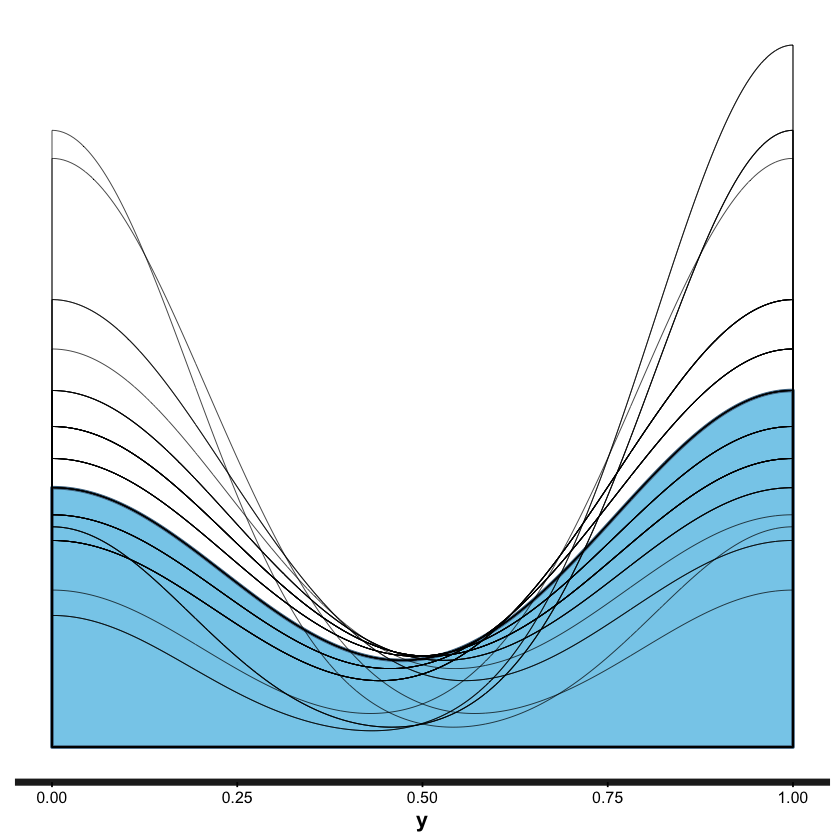

In [25]:
pp_check(s3_main, nreps = 50, seed = 45)

# The reduced model (supplementary information)
Because there is a significant number of missing data points for the cognitive abilities tests, we also ran a model which includes only the RPM and NEO scores. This increases the sample size from 102 to 136 participants. The processing pipeline is identical to the main analysis.

## Prepare the data

### Experiment 1

In [26]:
data_s1_reduced = data_s1[complete.cases(data_s1[,c(4:8, 19:23)]),]
data_s1_reduced_Z = data.frame(scale(data_s1_reduced[,c(5, 7:8, 19:23)]))
names(data_s1_reduced_Z) = paste(names(data_s1_reduced_Z), "_Z", sep="")
data_s1_reduced <- cbind(data_s1_reduced, data_s1_reduced_Z)

data_s1_reduced$sex_demeaned = data_s1_reduced$sex - mean(data_s1_reduced$sex)

### Experiment 2

In [27]:
data_s2_reduced = data_s2[complete.cases(data_s2[,c(4:8, 19:23)]),]
data_s2_reduced_Z = data.frame(scale(data_s2_reduced[,c(5, 7:8, 19:23)]))
names(data_s2_reduced_Z) = paste(names(data_s2_reduced_Z), "_Z", sep="")
data_s2_reduced <- cbind(data_s2_reduced, data_s2_reduced_Z)

data_s2_reduced$sex_demeaned = data_s2_reduced$sex - mean(data_s2_reduced$sex)

### Experiment 3

In [28]:
data_s3_reduced = data_s3[complete.cases(data_s3[,c(4:8, 19:23)]),]
data_s3_reduced_Z = data.frame(scale(data_s3_reduced[,c(5, 7:8, 19:23)]))
names(data_s3_reduced_Z) = paste(names(data_s3_reduced_Z), "_Z", sep="")
data_s3_reduced <- cbind(data_s3_reduced, data_s3_reduced_Z)

data_s3_reduced$sex_demeaned = data_s3_reduced$sex - mean(data_s3_reduced$sex)

## Analyze the data

### Experiment 1

In [29]:
s1_reduced <- stan_glm(strategy_binary ~ sex_demeaned + 
                            age_Z +
                            RPM_std_Z +
                            NEO_N_raw_Z +
                            NEO_E_raw_Z +
                            NEO_O_raw_Z +
                            NEO_A_raw_Z +
                            NEO_C_raw_Z +
                            NEO_N_raw_Z * RPM_std_Z +
                            NEO_E_raw_Z * RPM_std_Z +
                            NEO_O_raw_Z * RPM_std_Z +
                            NEO_A_raw_Z * RPM_std_Z +
                            NEO_C_raw_Z * RPM_std_Z, 
                          data = data_s1_reduced, 
                          family = binomial(link = "logit"), 
                          prior_intercept = normal(0,1), 
                          prior = normal(0,1),
                          chains = 4, 
                          cores = 2, 
                          seed = 10, 
                          iter = 10000)

In [30]:
summary(s1_reduced, digits = 2)

stan_glm(formula = strategy_binary ~ sex_demeaned + age_Z + RPM_std_Z + 
    NEO_N_raw_Z + NEO_E_raw_Z + NEO_O_raw_Z + NEO_A_raw_Z + NEO_C_raw_Z + 
    NEO_N_raw_Z * RPM_std_Z + NEO_E_raw_Z * RPM_std_Z + NEO_O_raw_Z * 
    RPM_std_Z + NEO_A_raw_Z * RPM_std_Z + NEO_C_raw_Z * RPM_std_Z, 
    family = binomial(link = "logit"), data = data_s1_reduced, 
    chains = 4, cores = 2, seed = 10, iter = 10000, prior = normal(0, 
        1), prior_intercept = normal(0, 1))

Family: binomial (logit)
Algorithm: sampling
Posterior sample size: 20000
Observations: 72

Estimates:
                        mean   sd     2.5%   25%    50%    75%    97.5%
(Intercept)             0.13   0.27  -0.40  -0.05   0.13   0.31   0.67 
sex_demeaned           -0.02   0.53  -1.06  -0.38  -0.02   0.33   1.04 
age_Z                  -0.19   0.26  -0.72  -0.37  -0.20  -0.01   0.32 
RPM_std_Z               0.70   0.28   0.17   0.51   0.70   0.89   1.25 
NEO_N_raw_Z            -0.42   0.28  -0.97  -0.61  -0.42  -0.23   0.12

### Experiment 2

#### Get priors

In [31]:
priors_s2_reduced_mean = fixef(s1_reduced)[c(2:14)]
priors_s2_reduced_sd = summary(s1_reduced)[c(2:14),3]

priors_s2_reduced_mean
priors_s2_reduced_sd

sex_demeaned                 age_Z             RPM_std_Z 
          -0.02195359           -0.19521131            0.70020307 
          NEO_N_raw_Z           NEO_E_raw_Z           NEO_O_raw_Z 
          -0.42262205            0.08880483            0.25352294 
          NEO_A_raw_Z           NEO_C_raw_Z RPM_std_Z:NEO_N_raw_Z 
          -0.65055739           -0.24731907            0.14362479 
RPM_std_Z:NEO_E_raw_Z RPM_std_Z:NEO_O_raw_Z RPM_std_Z:NEO_A_raw_Z 
           0.42592037            0.06672055           -0.18749041 
RPM_std_Z:NEO_C_raw_Z 
           0.15131555

sex_demeaned                 age_Z             RPM_std_Z 
            0.5311139             0.2633378             0.2756584 
          NEO_N_raw_Z           NEO_E_raw_Z           NEO_O_raw_Z 
            0.2779927             0.2744238             0.2621810 
          NEO_A_raw_Z           NEO_C_raw_Z RPM_std_Z:NEO_N_raw_Z 
            0.2827727             0.2666538             0.3087378 
RPM_std_Z:NEO_E_raw_Z RPM_std_Z:NEO_O_raw_Z RPM_std_Z:NEO_A_raw_Z 
            0.3203869             0.2937079             0.3061871 
RPM_std_Z:NEO_C_raw_Z 
            0.2943502

#### Run the model

In [32]:
s2_reduced <- stan_glm(strategy_binary ~ sex_demeaned + 
                            age_Z +
                            RPM_std_Z +
                            NEO_N_raw_Z +
                            NEO_E_raw_Z +
                            NEO_O_raw_Z +
                            NEO_A_raw_Z +
                            NEO_C_raw_Z +
                            NEO_N_raw_Z * RPM_std_Z +
                            NEO_E_raw_Z * RPM_std_Z +
                            NEO_O_raw_Z * RPM_std_Z +
                            NEO_A_raw_Z * RPM_std_Z +
                            NEO_C_raw_Z * RPM_std_Z, 
                            data = data_s2_reduced, family = binomial(link = "logit"), 
                            chains = 4,
                            prior_intercept = normal(0,2),
                            prior = normal(priors_s2_reduced_mean, priors_s2_reduced_sd),
                            seed = 1234, cores = 2, iter = 10000)

In [33]:
summary(s2_reduced, digits = 2)

stan_glm(formula = strategy_binary ~ sex_demeaned + age_Z + RPM_std_Z + 
    NEO_N_raw_Z + NEO_E_raw_Z + NEO_O_raw_Z + NEO_A_raw_Z + NEO_C_raw_Z + 
    NEO_N_raw_Z * RPM_std_Z + NEO_E_raw_Z * RPM_std_Z + NEO_O_raw_Z * 
    RPM_std_Z + NEO_A_raw_Z * RPM_std_Z + NEO_C_raw_Z * RPM_std_Z, 
    family = binomial(link = "logit"), data = data_s2_reduced, 
    chains = 4, seed = 1234, cores = 2, iter = 10000, prior = normal(priors_s2_reduced_mean, 
        priors_s2_reduced_sd), prior_intercept = normal(0, 2))

Family: binomial (logit)
Algorithm: sampling
Posterior sample size: 20000
Observations: 36

Estimates:
                        mean   sd     2.5%   25%    50%    75%    97.5%
(Intercept)             1.19   0.42   0.40   0.90   1.18   1.46   2.04 
sex_demeaned            0.12   0.45  -0.76  -0.19   0.12   0.42   1.00 
age_Z                  -0.17   0.12  -0.41  -0.25  -0.17  -0.09   0.07 
RPM_std_Z               0.65   0.13   0.40   0.56   0.65   0.74   0.90 
NEO_N_raw_Z            -0.41

### Experiment 3

#### Get priors

In [34]:
priors_s3_reduced_mean = fixef(s2_reduced)[c(2:14)]
priors_s3_reduced_sd = summary(s2_reduced)[c(2:14),3]

priors_s3_reduced_mean
priors_s3_reduced_sd

sex_demeaned                 age_Z             RPM_std_Z 
           0.11784601           -0.17108947            0.65062729 
          NEO_N_raw_Z           NEO_E_raw_Z           NEO_O_raw_Z 
          -0.40961763            0.11693501            0.24105913 
          NEO_A_raw_Z           NEO_C_raw_Z RPM_std_Z:NEO_N_raw_Z 
          -0.63992388           -0.29996733            0.09671002 
RPM_std_Z:NEO_E_raw_Z RPM_std_Z:NEO_O_raw_Z RPM_std_Z:NEO_A_raw_Z 
           0.45489903            0.09813730           -0.17532533 
RPM_std_Z:NEO_C_raw_Z 
           0.19477762

sex_demeaned                 age_Z             RPM_std_Z 
            0.4490021             0.1237888             0.1279714 
          NEO_N_raw_Z           NEO_E_raw_Z           NEO_O_raw_Z 
            0.1312733             0.1277990             0.1254048 
          NEO_A_raw_Z           NEO_C_raw_Z RPM_std_Z:NEO_N_raw_Z 
            0.1347023             0.1266050             0.1280001 
RPM_std_Z:NEO_E_raw_Z RPM_std_Z:NEO_O_raw_Z RPM_std_Z:NEO_A_raw_Z 
            0.1442862             0.1777312             0.1408342 
RPM_std_Z:NEO_C_raw_Z 
            0.1375807

#### Run the model

In [35]:
s3_reduced <- stan_glm(strategy_binary ~ sex_demeaned + 
                            age_Z +
                            RPM_std_Z +
                            NEO_N_raw_Z +
                            NEO_E_raw_Z +
                            NEO_O_raw_Z +
                            NEO_A_raw_Z +
                            NEO_C_raw_Z +
                            NEO_N_raw_Z * RPM_std_Z +
                            NEO_E_raw_Z * RPM_std_Z +
                            NEO_O_raw_Z * RPM_std_Z +
                            NEO_A_raw_Z * RPM_std_Z +
                            NEO_C_raw_Z * RPM_std_Z,
                            data = data_s3_reduced, family = binomial(link = "logit"), 
                            chains = 4,
                            prior_intercept = normal(0,1),
                            prior = normal(priors_s3_reduced_mean, priors_s3_reduced_sd),
                            cores = 2, iter = 10000, seed = 100)

In [36]:
summary(s3_reduced, digits = 2)

stan_glm(formula = strategy_binary ~ sex_demeaned + age_Z + RPM_std_Z + 
    NEO_N_raw_Z + NEO_E_raw_Z + NEO_O_raw_Z + NEO_A_raw_Z + NEO_C_raw_Z + 
    NEO_N_raw_Z * RPM_std_Z + NEO_E_raw_Z * RPM_std_Z + NEO_O_raw_Z * 
    RPM_std_Z + NEO_A_raw_Z * RPM_std_Z + NEO_C_raw_Z * RPM_std_Z, 
    family = binomial(link = "logit"), data = data_s3_reduced, 
    chains = 4, cores = 2, iter = 10000, seed = 100, prior = normal(priors_s3_reduced_mean, 
        priors_s3_reduced_sd), prior_intercept = normal(0, 1))

Family: binomial (logit)
Algorithm: sampling
Posterior sample size: 20000
Observations: 21

Estimates:
                        mean   sd     2.5%   25%    50%    75%    97.5%
(Intercept)             0.20   0.45  -0.67  -0.09   0.20   0.50   1.08 
sex_demeaned            0.16   0.41  -0.65  -0.12   0.16   0.43   0.95 
age_Z                  -0.17   0.06  -0.28  -0.21  -0.17  -0.13  -0.05 
RPM_std_Z               0.65   0.06   0.53   0.61   0.65   0.69   0.77 
NEO_N_raw_Z            -0.40 

## Posterior predictive checks

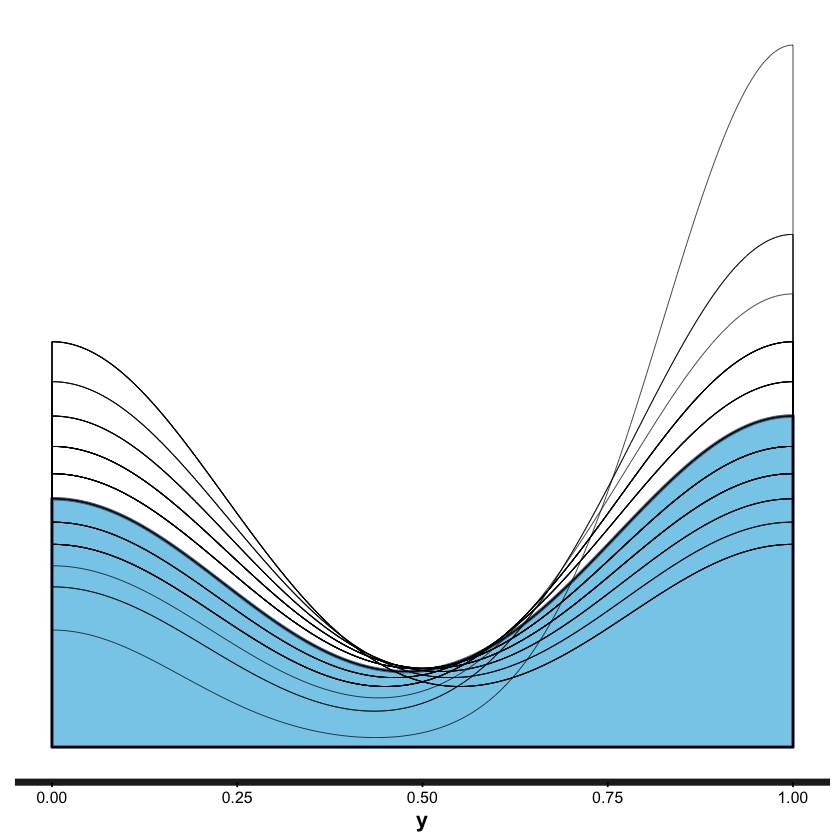

In [37]:
pp_check(s3_reduced, nreps = 50)